# Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
# Import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel(r"C:\Users\qndlovu\Data Science source data\Online Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Get concise summary of the dataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
# Check columns with missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

This data Frame contains 8 columns of diffferent data types. Only two columns contain missing values: Description & CustomerID

In [5]:
# Can not be associated with anyone, can not track by product: Drop rows with null values
data.dropna(subset=['CustomerID','Description'],inplace=True)

In [7]:
data.CustomerID.isnull().sum()

0

In [8]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


# But what counts as a duplicate here?

- Primary unique identifiers = InvoiceNo + StockCode + Quantity + InvoiceDate + UnitPrice + CustomerID
- A row is not a duplicate just because it shares the same CustomerID or StockCode


In [9]:
# find real duplicates(by logic)
duplicates = data[data.duplicated(
    subset=['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID'],
    keep=False
)]

duplicates

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [10]:
# Keep only the first record found
data_cleaned = data.drop_duplicates(
    subset=['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID'],
    keep='first'
)

In [11]:
# Now check if duplicates are still there, 0 means No duplicates
data_cleaned.duplicated(
    subset=['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID']).sum()


0

In [12]:
# Get descriptive statistics of the dataFrame
data_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401602.000000,401602,401602.000000,401602.000000
mean,12.182579,2011-07-10 12:08:08.129839872,3.474064,15281.172576
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:00,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283248,NaN,69.764209,1714.002257


# Quick interpretation: 
- Quantity - there are returns or refunds, some big outliers might skew the analysis
- Unit price - Need to inspect UnitPrice at 0, drop extreme outliers if they distort trends*
- InvoiceDate - data spans approx 1 year, good for monthly/weekly trend analysis, median and quartiles show decent spread
- CustomerId - not much useful, for now

In [19]:
# Quantity must be > 0 and/or UnitPrice > 0

data = data_cleaned[(data_cleaned['Quantity'] > 0) & (data_cleaned['UnitPrice'] > 0)]


In [20]:
data.duplicated().sum()

0

In [21]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392690.000000,392690,392690.000000,392690.000000
mean,13.118997,2011-07-10 19:12:51.826224128,3.125913,15287.855925
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.492710,NaN,22.241892,1713.535580


In [22]:
# Remove outliers
# Use interquartile Range Method 

#Quantity
Q1_qty = data['Quantity'].quantile(0.25)
Q3_qty = data['Quantity'].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty
lower_qty = Q1_qty - 1.5 * IQR_qty
upper_qty = Q3_qty + 1.5 * IQR_qty

# for UnitPrice
Q1_price = data['UnitPrice'].quantile(0.25)
Q3_price = data['UnitPrice'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_price = Q1_price - 1.5 * IQR_price
upper_price = Q3_price + 1.5 * IQR_price

# Filter the data
data = data[
    (data['Quantity'] >= lower_qty) & (data['Quantity'] <= upper_qty) &
    (data['UnitPrice'] >= lower_price) & (data['UnitPrice'] <= upper_price)
]

In [23]:
# Lets confirmed the above worked
print(data['Quantity'].describe())
print(data['UnitPrice'].describe())

count    333233.000000
mean          7.550696
std           6.777243
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max          27.000000
Name: Quantity, dtype: float64
count    333233.00000
mean          2.19421
std           1.54601
min           0.00100
25%           1.25000
50%           1.65000
75%           2.95000
max           7.50000
Name: UnitPrice, dtype: float64


# Quantity Distribution

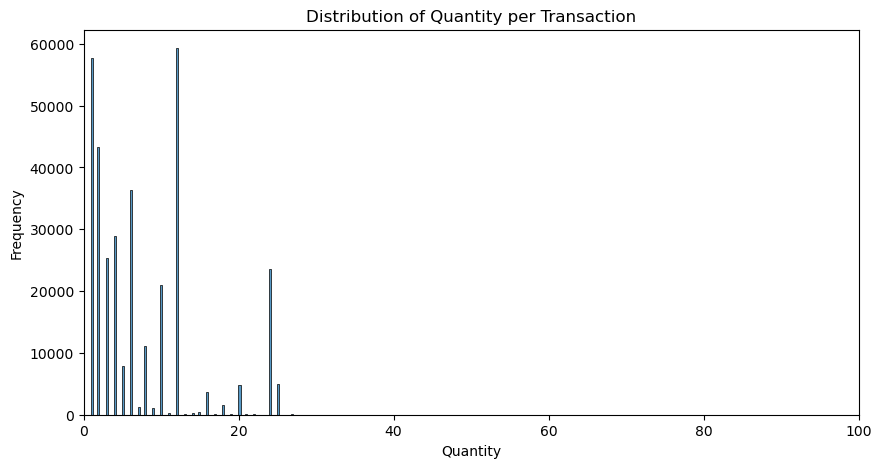

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(data['Quantity'], bins=100, kde=False)
plt.title('Distribution of Quantity per Transaction')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.show()


# UnitPrice Distribution

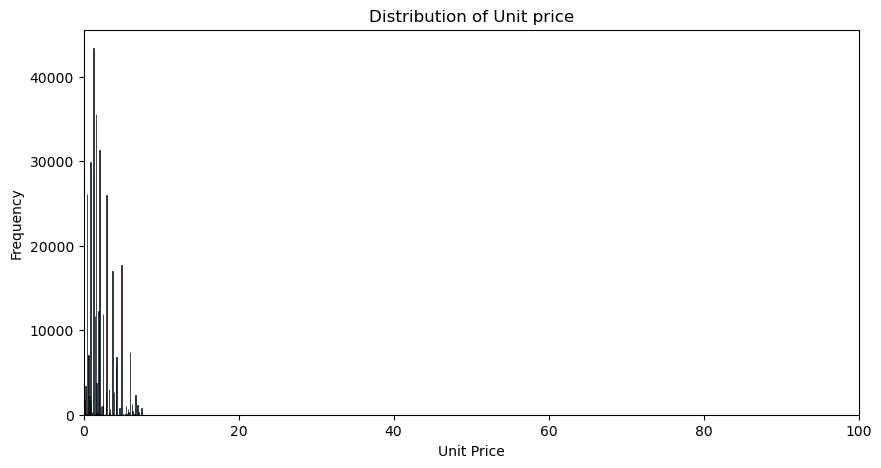

In [25]:
#same code as above ..
plt.figure(figsize=(10,5))
sns.histplot(data['UnitPrice'], bins=100, kde=False)
plt.title('Distribution of Unit price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.show()


# Relationship between Quantiy & Unit Price

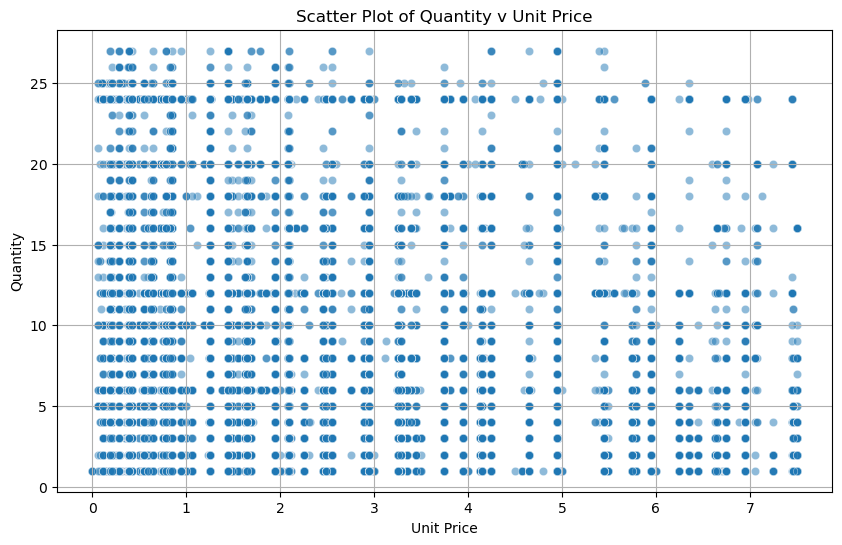

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='UnitPrice', 
    y='Quantity', 
    data=data, 
    alpha=0.5 
)
plt.title('Scatter Plot of Quantity v Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()


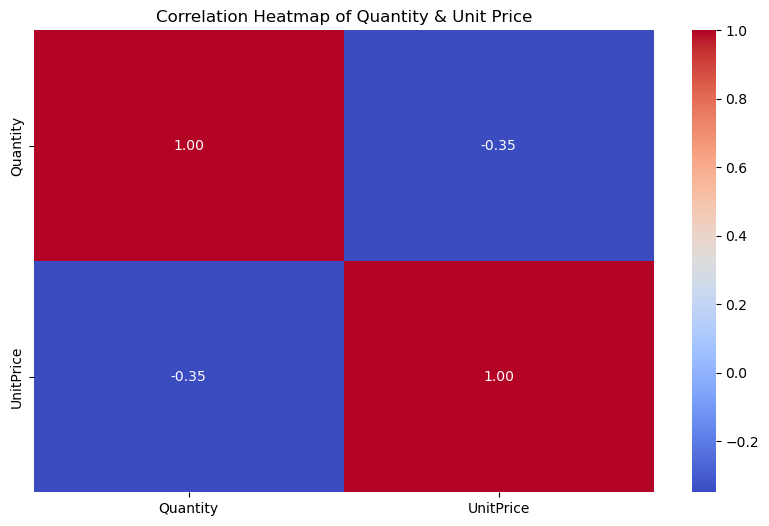

In [27]:
numeric_data = data[['Quantity','UnitPrice']]
corr = numeric_data.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Quantity & Unit Price")
plt.show()

# Analyse the sales trends over time

In [30]:
# Creat total price column
data['TotalPrice'] = data['Quantity']*data['UnitPrice']
# convert invoiceDate to DateTime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
# extract time components
data['InvoiceMonth'] = data['InvoiceDate'].dt.to_period('M')
data['InvoiceDateOnly'] = data['InvoiceDate'].dt.date  

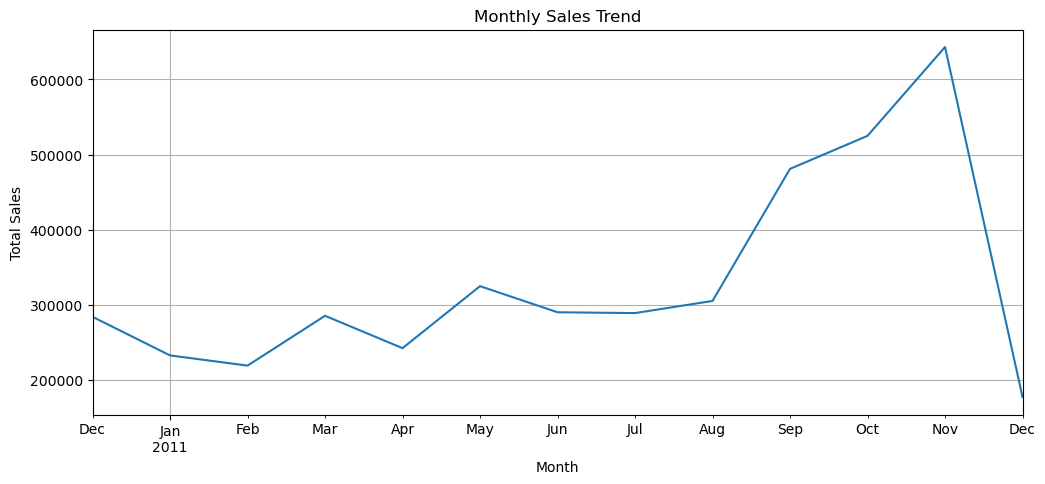

In [31]:
# Group sales over time.
# Monthly Sales Trend
monthly_sales = data.groupby('InvoiceMonth')['TotalPrice'].sum()

monthly_sales.plot(kind='line', figsize=(12, 5), title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


# Daily Sales Trend

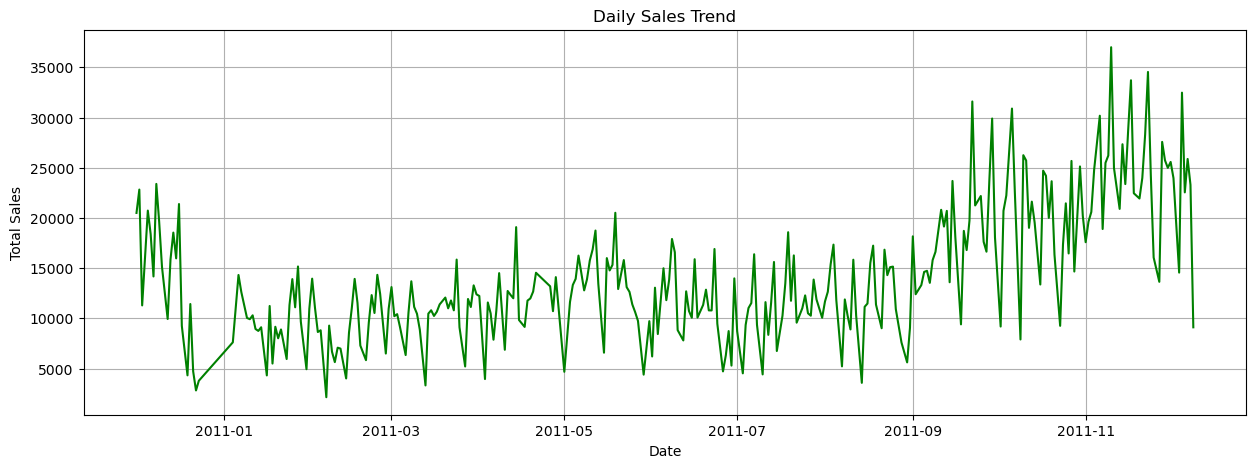

In [32]:

daily_sales = data.groupby('InvoiceDateOnly')['TotalPrice'].sum()
daily_sales.plot(kind='line', figsize=(15, 5), title='Daily Sales Trend', color='green')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


# By weekday

<Axes: title={'center': 'Sales Mon - Sun'}, xlabel='Weekday'>

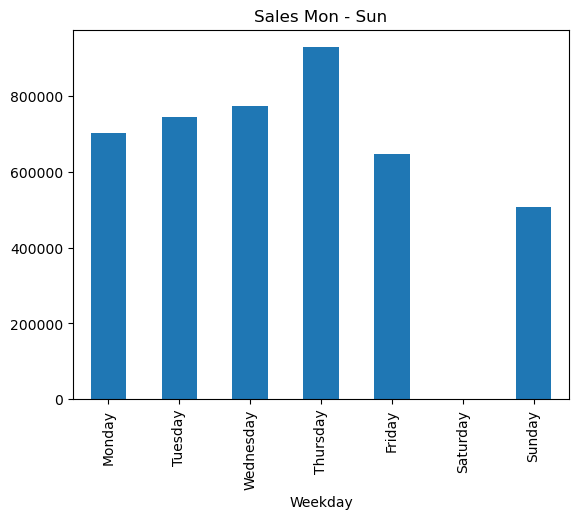

In [34]:

data['Weekday'] = data['InvoiceDate'].dt.day_name()
weekday_sales = data.groupby('Weekday')['TotalPrice'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

weekday_sales.plot(kind='bar', title='Sales Mon - Sun')


# Explore top selling products, by quantity

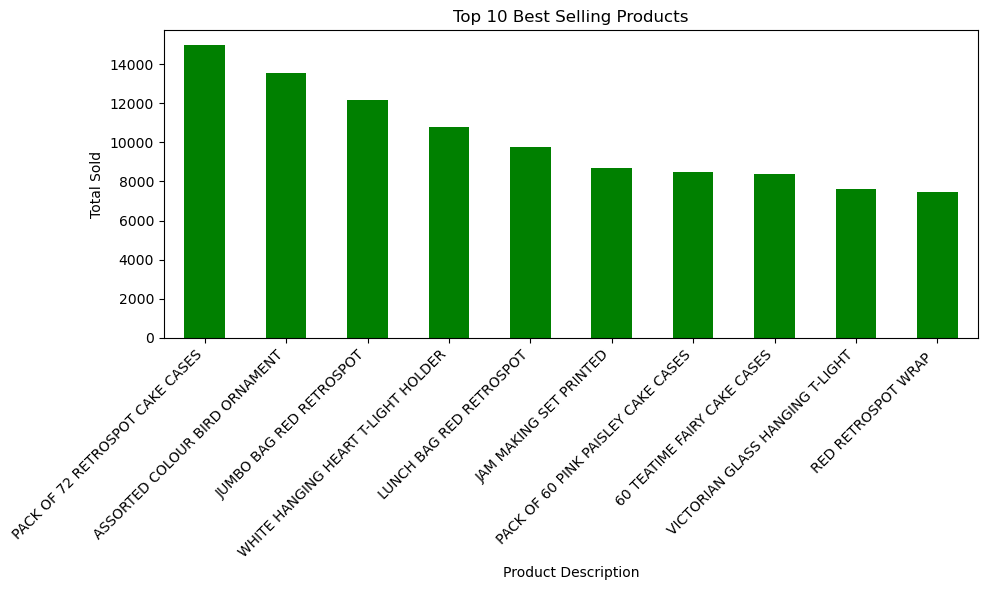

In [37]:
best_selling = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

best_selling.plot(kind='bar', figsize=(10, 6), title='Top 10 Best Selling Products', color='green')
plt.ylabel('Total Sold')
plt.xlabel('Product Description')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top Countries by Quantity Sold

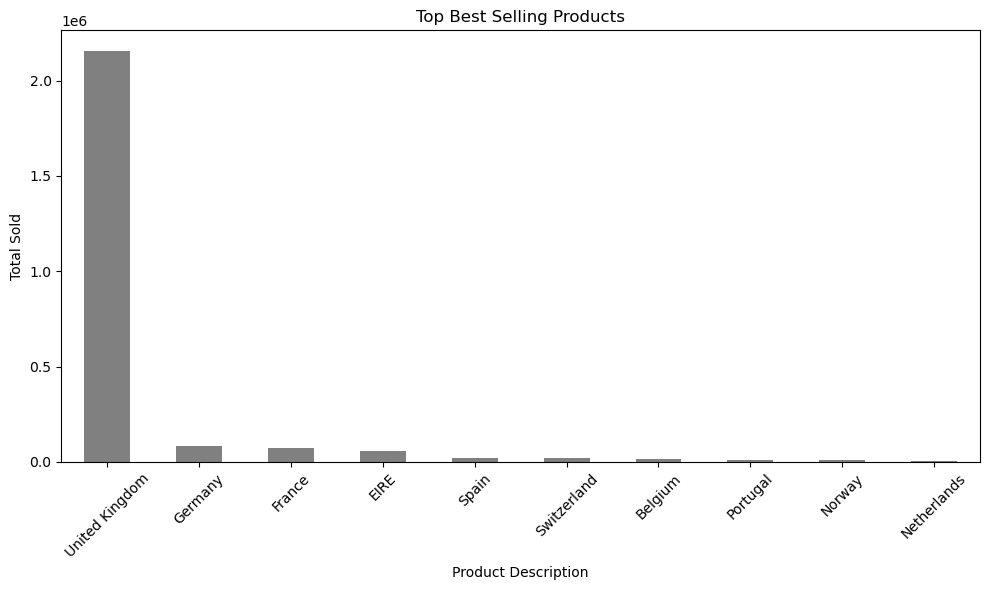

In [39]:
# Top 10
top_country = data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

top_country.plot(kind='bar', figsize=(10, 6), title='Top Best Selling Products', color='grey')
plt.ylabel('Total Sold')
plt.xlabel('Product Description')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# "Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis"

- I have already touched this above after the code -- data_cleaned.describe()

- 'Quantity - there are returns or refunds, some big outliers might skew the analysis
- Unit price - Need to inspect UnitPrice at 0, drop extreme outliers if they distort trends*
- InvoiceDate - data spans approx 1 year, good for monthly/weekly trend analysis, median and quartiles show decent spread'


# My conclusion

Overall Sales Performance:
- The trend shows the performance is not consistent, may be indicating seasonality, holiday effects or promotions. 

Final thoughts:
- Focus on invetory and pricing for top-selling products
- Expand in top performing regions, explore underperforming ones.

